In [56]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [57]:
df = pd.read_csv("market-price.csv")
df.columns = ['Date','X']
df.drop(['Date'], 1, inplace=True)

In [58]:
df["Y"] = df["X"].shift(-1)
df.dropna(axis=0, inplace=True)
df.head(5)

,X,Y
0,386.49,373.04
1,373.04,373.74
2,373.74,375.80
3,375.80,372.61
4,372.61,378.98


In [59]:
df = min_max_scaler.fit_transform(df)

In [60]:
prediction_days = 30
last_index = df.shape[0] - prediction_days

X_train, X_test = df[:last_index, 0], df[last_index:, 0]
y_train, y_test = df[:last_index, 1], df[last_index:, 1]

In [61]:
X_train = np.expand_dims(X_train, 1)
X_train = np.expand_dims(X_train, 2)

X_test = np.expand_dims(X_test, 1)
X_test = np.expand_dims(X_test, 2)

y_train = np.expand_dims(y_train, 1)

y_test = np.expand_dims(y_test, 1)

In [68]:
X_train

array([[[  7.25710906e-04]],

       [[  2.24823984e-05]],

       [[  5.90816515e-05]],

       [[  1.66788025e-04]],

       [[  0.00000000e+00]],

       [[  3.33053204e-04]],

       [[  2.16458440e-04]],

       [[  4.62719129e-04]],

       [[  8.36031512e-04]],

       [[  1.55651395e-03]],

       [[  1.57010796e-03]],

       [[  1.78186078e-03]],

       [[  2.37529153e-03]],

       [[  2.42391625e-03]],

       [[  2.37424584e-03]],

       [[  3.49627437e-03]],

       [[  3.24478522e-03]],

       [[  3.44503542e-03]],

       [[  2.32091550e-03]],

       [[  2.63985185e-03]],

       [[  2.55096795e-03]],

       [[  2.70468481e-03]],

       [[  3.10518521e-03]],

       [[  3.18204364e-03]],

       [[  3.32373503e-03]],

       [[  3.09838820e-03]],

       [[  3.00009307e-03]],

       [[  2.55305933e-03]],

       [[  2.29372748e-03]],

       [[  1.48436114e-03]],

       [[  1.89531847e-03]],

       [[  2.05635518e-03]],

       [[  2.07988327e-03]],

       [[ 

In [63]:
num_units = 1
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 1
num_epochs = 10

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, validation_data=(X_test, y_test))
regressor.save('model.h5')

Train on 698 samples, validate on 30 samples
Epoch 1/10
698/698 [==============================] - 4s 5ms/step - loss: 0.0347 - val_loss: 0.2579
Epoch 2/10
698/698 [==============================] - 3s 4ms/step - loss: 0.0272 - val_loss: 0.1955
Epoch 3/10
698/698 [==============================] - 3s 5ms/step - loss: 0.0184 - val_loss: 0.1118
Epoch 4/10
698/698 [==============================] - 3s 4ms/step - loss: 0.0094 - val_loss: 0.0442
Epoch 5/10
698/698 [==============================] - 3s 4ms/step - loss: 0.0029 - val_loss: 0.0072
Epoch 6/10
698/698 [==============================] - 3s 4ms/step - loss: 5.1761e-04 - val_loss: 0.0024
Epoch 7/10
698/698 [==============================] - 3s 4ms/step - loss: 2.1126e-04 - val_loss: 0.0031
Epoch 8/10
698/698 [==============================] - 3s 4ms/step - loss: 2.0354e-04 - val_loss: 0.0032
Epoch 9/10
698/698 [==============================] - 3s 4ms/step - loss: 1.9610e-04 - val_loss: 0.0026
Epoch 10/10
698/698 [==================

In [64]:
predicted_price = regressor.predict(X_test)

In [53]:
# predicted_price = min_max_scaler.inverse_transform(predicted_price)
# real_price = min_max_scaler.inverse_transform(y_test.reshape(1,-1))

ValueError: non-broadcastable output operand with shape (30,1) doesn't match the broadcast shape (30,2)

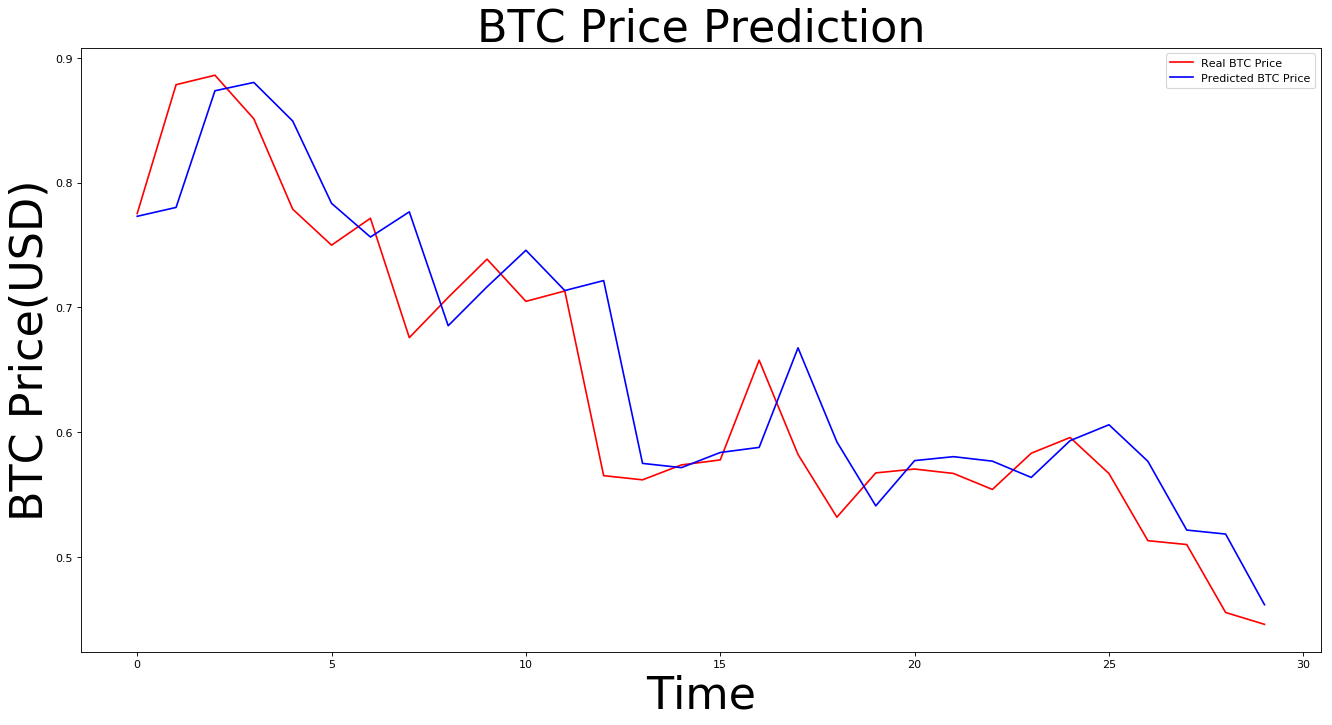

In [65]:
plt.figure(figsize=(20, 10), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(y_test.reshape(-1, 1), color='red', label='Real BTC Price')
plt.plot(predicted_price.reshape(-1,1), color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend(loc = 'best')
plt.show()